In [1]:
#Load the libraries

import scanpy as sc
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import scanpy.external as sce
import seaborn as sns
import anndata as ad
import squidpy as sq
import scvi
from sccoda.util import cell_composition_data as dat
from sccoda.util import data_visualization as viz
import warnings
warnings.filterwarnings("ignore")
from sccoda.util import comp_ana as mod

Global seed set to 0


In [2]:
# Load PRJCA001063

adata = sc.read("D:Scanpy/peng_pdac_besca2.raw.h5ad")

In [3]:
adata.obs.rename(columns = {'CONDITION':'Condition'}, inplace = True)
adata.obs

CELL Condition Patient Type  \
T1_AAACCTGAGATGTCGG    T1_AAACCTGAGATGTCGG         T      T1    T   
T1_AAACGGGGTCATGCAT    T1_AAACGGGGTCATGCAT         T      T1    T   
T1_AAAGATGCATGTTGAC    T1_AAAGATGCATGTTGAC         T      T1    T   
T1_AAAGATGGTCGAGTTT    T1_AAAGATGGTCGAGTTT         T      T1    T   
T1_AAAGATGGTCTCTCTG    T1_AAAGATGGTCTCTCTG         T      T1    T   
...                                    ...       ...     ...  ...   
N11_TTTGCGCGTGCGCTTG  N11_TTTGCGCGTGCGCTTG         N     N11    N   
N11_TTTGGTTCATTGAGCT  N11_TTTGGTTCATTGAGCT         N     N11    N   
N11_TTTGGTTGTCCGACGT  N11_TTTGGTTGTCCGACGT         N     N11    N   
N11_TTTGTCAAGGCTAGCA  N11_TTTGTCAAGGCTAGCA         N     N11    N   
N11_TTTGTCACATCGGACC  N11_TTTGTCACATCGGACC         N     N11    N   

                               Cell_type  
T1_AAACCTGAGATGTCGG      Fibroblast cell  
T1_AAACGGGGTCATGCAT        Stellate cell  
T1_AAAGATGCATGTTGAC      Macrophage cell  
T1_AAAGATGGTCGAGTTT      Macrophage cell  
T1_AAAGATGGTCTCTCTG     Endothelial cell  
...                                  ...  
N11_TTTGCGCGTGCGCTTG    Endothelial cell  
N11_TTTGGTTCATTGAGCT         Acinar cell  
N11_TTTGGTTGTCCGACGT  Ductal cell type 1  
N11_TTTGTCAAGGCTAGCA         Acinar cell  
N11_TTTGTCACATCGGACC    Endothelial cell  

[57530 rows x 5 columns]

In [4]:
del(adata.obs['CELL'])
del(adata.obs['Type'])
del(adata.obs['Cell_type'])
adata.obs

Condition Patient
T1_AAACCTGAGATGTCGG          T      T1
T1_AAACGGGGTCATGCAT          T      T1
T1_AAAGATGCATGTTGAC          T      T1
T1_AAAGATGGTCGAGTTT          T      T1
T1_AAAGATGGTCTCTCTG          T      T1
...                        ...     ...
N11_TTTGCGCGTGCGCTTG         N     N11
N11_TTTGGTTCATTGAGCT         N     N11
N11_TTTGGTTGTCCGACGT         N     N11
N11_TTTGTCAAGGCTAGCA         N     N11
N11_TTTGTCACATCGGACC         N     N11

[57530 rows x 2 columns]

In [5]:
adata.var['mt'] = adata.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

In [7]:
adata.obs

Condition Patient  n_genes_by_counts  total_counts  \
T1_AAACCTGAGATGTCGG          T      T1               3343       11812.0   
T1_AAACGGGGTCATGCAT          T      T1                974        1935.0   
T1_AAAGATGCATGTTGAC          T      T1               1490        3811.0   
T1_AAAGATGGTCGAGTTT          T      T1               1101        2069.0   
T1_AAAGATGGTCTCTCTG          T      T1               3189        8706.0   
...                        ...     ...                ...           ...   
N11_TTTGCGCGTGCGCTTG         N     N11               1465        2900.0   
N11_TTTGGTTCATTGAGCT         N     N11               4887       36189.0   
N11_TTTGGTTGTCCGACGT         N     N11               1058        1964.0   
N11_TTTGTCAAGGCTAGCA         N     N11                275        1799.0   
N11_TTTGTCACATCGGACC         N     N11                968        1736.0   

                      total_counts_mt  pct_counts_mt  
T1_AAACCTGAGATGTCGG               0.0            0.0  
T1_AAACGGGGTCATGCAT               0.0            0.0  
T1_AAAGATGCATGTTGAC               0.0            0.0  
T1_AAAGATGGTCGAGTTT               0.0            0.0  
T1_AAAGATGGTCTCTCTG               0.0            0.0  
...                               ...            ...  
N11_TTTGCGCGTGCGCTTG              0.0            0.0  
N11_TTTGGTTCATTGAGCT              0.0            0.0  
N11_TTTGGTTGTCCGACGT              0.0            0.0  
N11_TTTGTCAAGGCTAGCA              0.0            0.0  
N11_TTTGTCACATCGGACC              0.0            0.0  

[57530 rows x 6 columns]

In [8]:
adata.layers['counts'] = adata.X.copy()

In [9]:
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
adata.raw = adata

In [11]:
sc.pp.highly_variable_genes(adata, flavor='seurat', n_top_genes=3000, layer='counts', batch_key='Patient',subset=True)

In [12]:
adata

AnnData object with n_obs × n_vars = 57530 × 3000
    obs: 'Condition', 'Patient', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'ENSEMBL', 'SYMBOL', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'log1p', 'hvg'
    layers: 'counts'

In [13]:
scvi.model.SCVI.setup_anndata(adata, layer = "counts",
                             categorical_covariate_keys=["Patient"],
                             continuous_covariate_keys=['total_counts'])

INFO     No batch_key inputted, assuming all cells are same batch                                                  
INFO     No label_key inputted, assuming all cells have same label                                                 
INFO     Using data from adata.layers["counts"]                                                                    
INFO     Successfully registered anndata object containing 57530 cells, 3000 vars, 1 batches, 1 labels, and 0      
         proteins. Also registered 1 extra categorical covariates and 1 extra continuous covariates.               
INFO     Please do not further modify adata until model is trained.                                                


In [14]:
model = scvi.model.SCVI(adata)

In [15]:
model.train()

GPU available: False, used: False
TPU available: False, using: 0 TPU cores


Epoch 139/139: 100%|███████████████████████████████████████| 139/139 [1:08:33<00:00, 29.59s/it, loss=1.31e+03, v_num=1]


In [16]:
adata.obsm['X_scVI'] = model.get_latent_representation()

In [17]:
adata.layers['scvi_normalized'] = model.get_normalized_expression(library_size = 1e4)

In [18]:
sc.pp.neighbors(adata, use_rep = 'X_scVI')

In [19]:
sc.tl.umap(adata)
sc.tl.leiden(adata, resolution = 0.3)

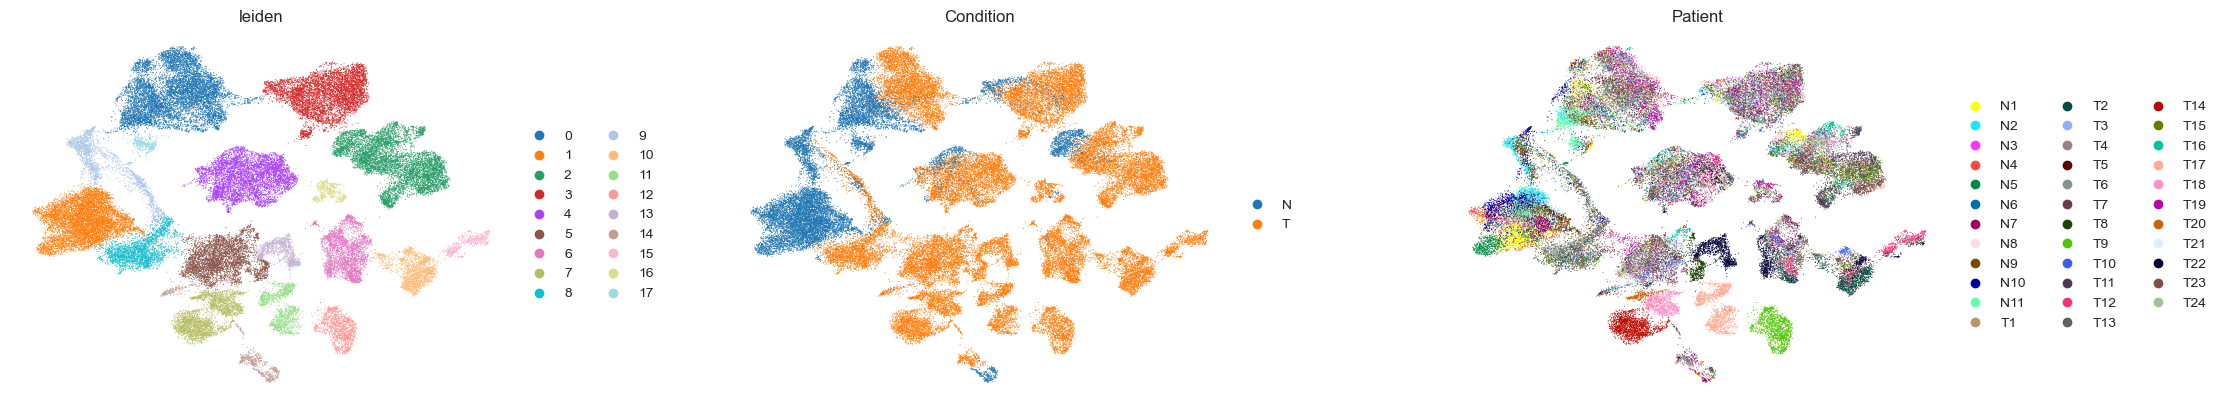

In [20]:
sc.pl.umap(adata, color = ['leiden', 'Condition', 'Patient'], frameon = False, wspace=0.3)

In [24]:
#sc.pl.umap(adata, color=['leiden','Condition','FXYD3','COL1A1','PTPRC','PLVAP'],ncols=2,cmap='viridis',frameon=False,wspace=0.2)

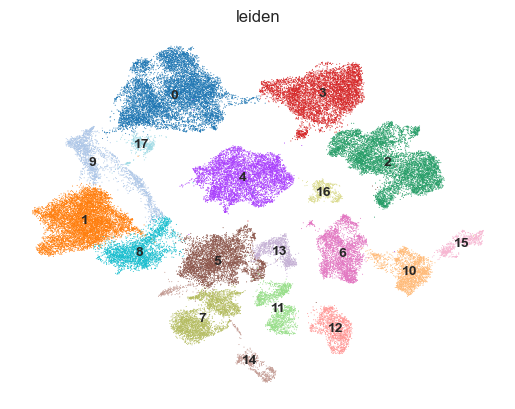

In [25]:
sc.pl.umap(adata, color='leiden', legend_loc='on data', frameon=False)

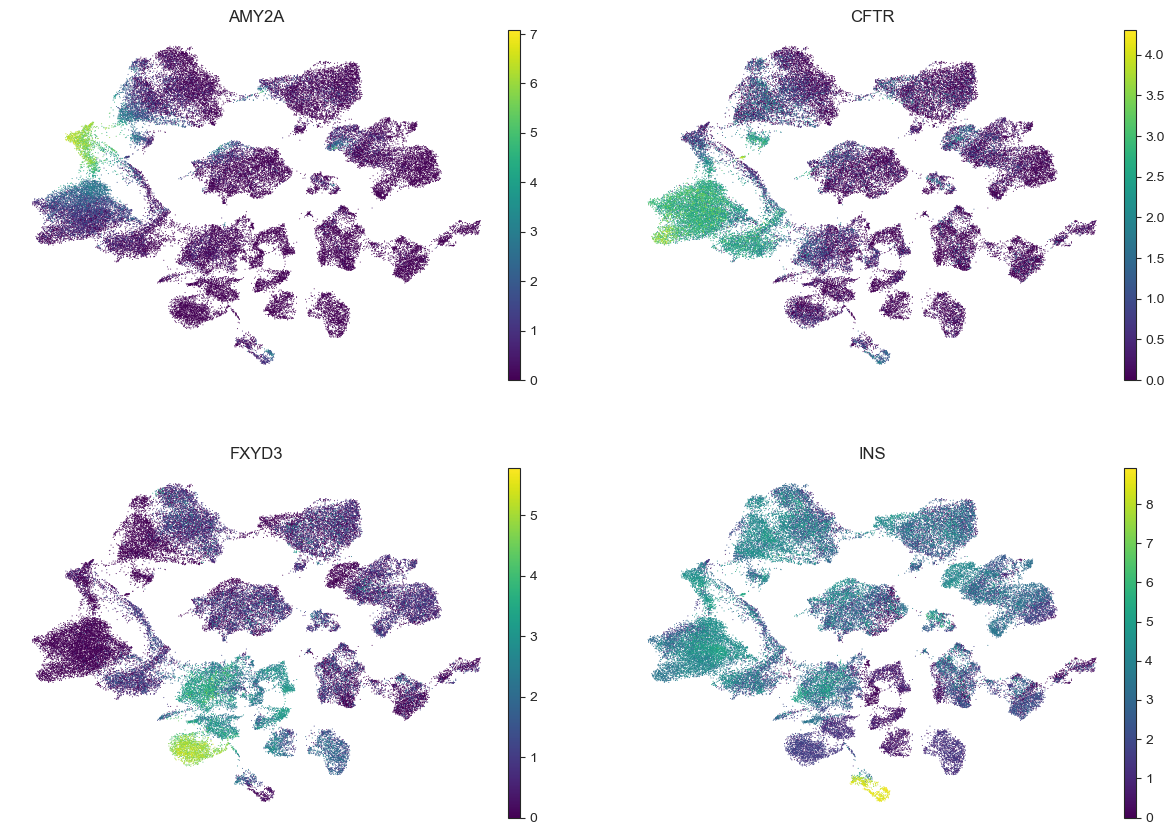

In [32]:
#Epithelial markers

sc.pl.umap(adata, color=['AMY2A','CFTR','FXYD3','INS'],cmap='viridis',frameon=False,ncols=2)

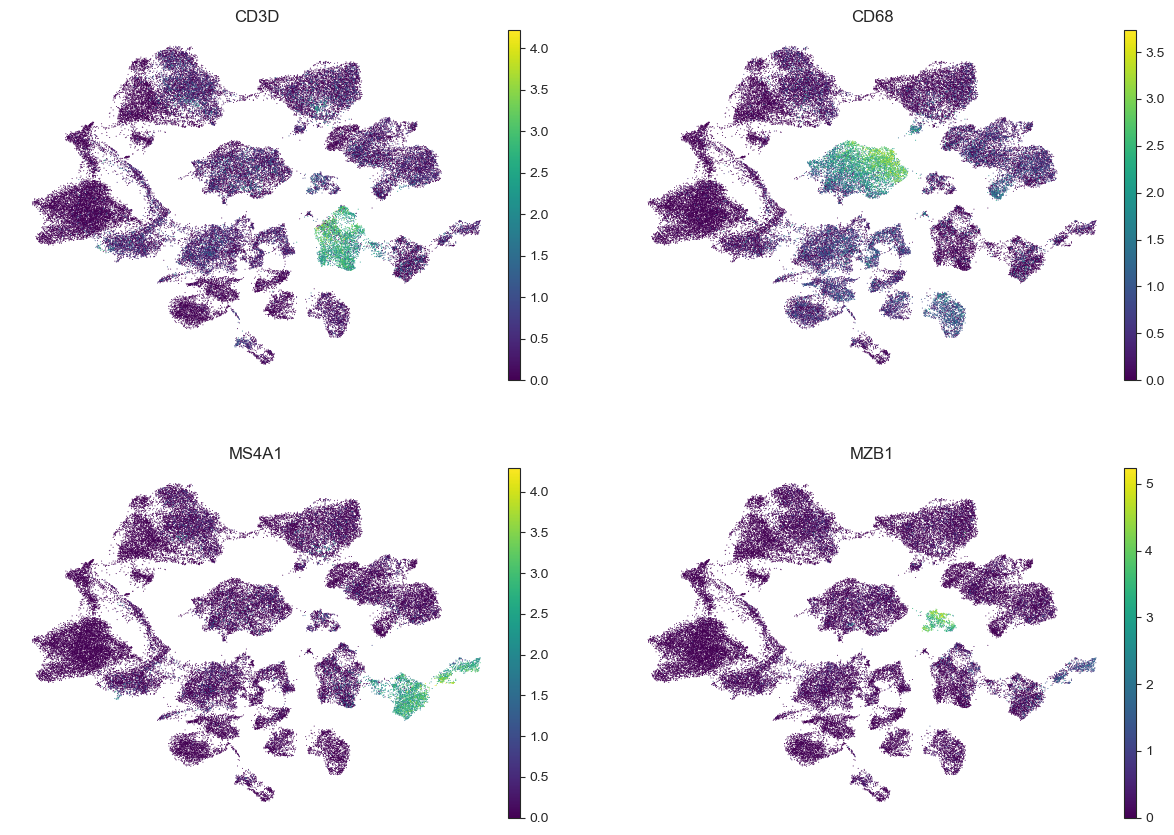

In [33]:
#Immune markers

sc.pl.umap(adata, color=['CD3D','CD68','MS4A1','MZB1'],cmap='viridis',frameon=False,ncols=2)

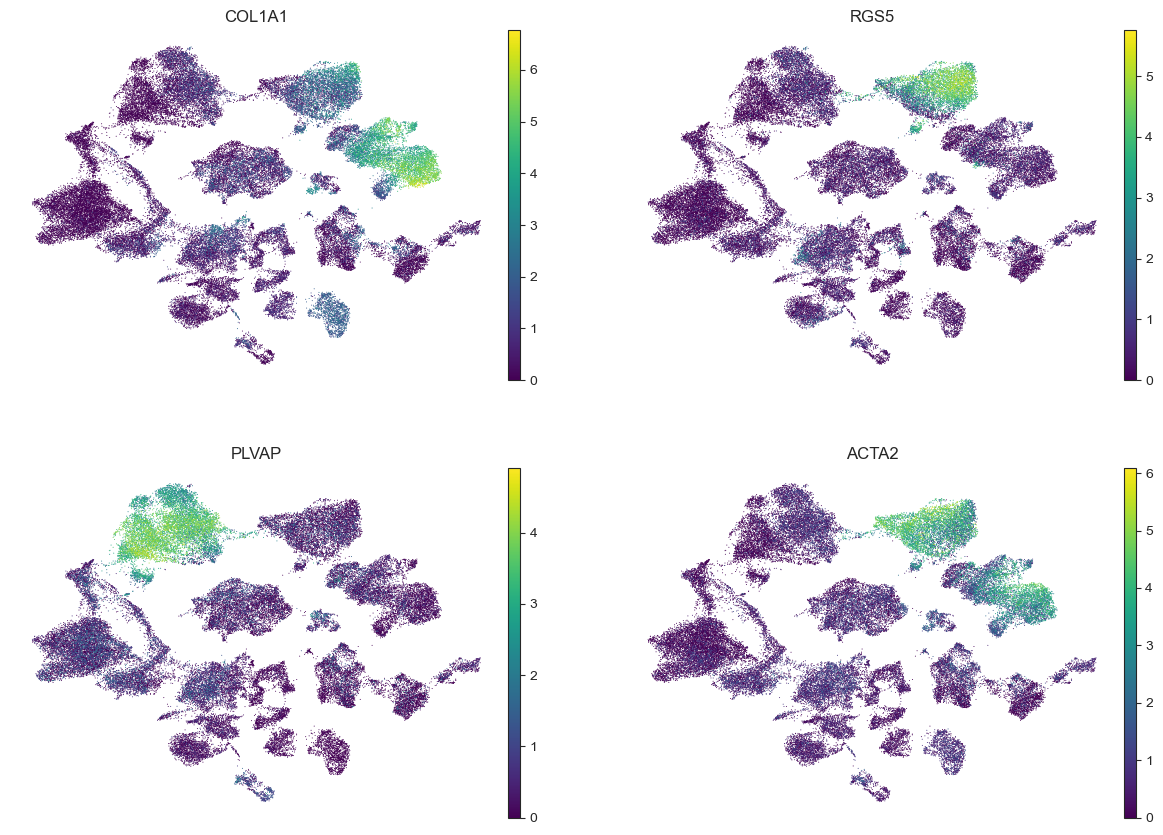

In [35]:
#Stromal markers

sc.pl.umap(adata, color=['COL1A1','RGS5','PLVAP','ACTA2'],cmap='viridis',ncols=2,frameon=False)

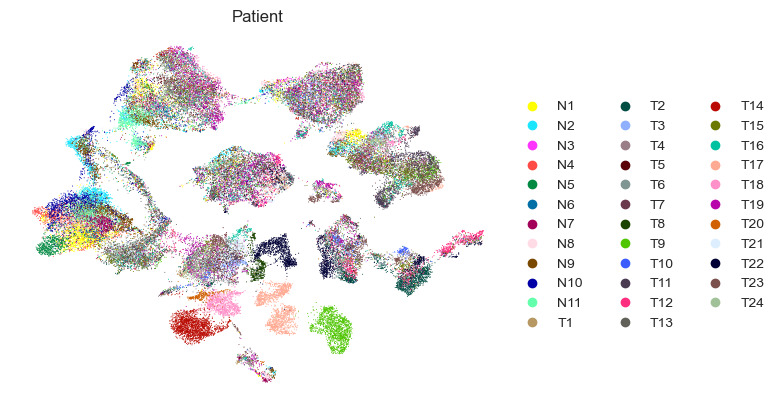

In [38]:
sc.pl.umap(adata, color='Patient',frameon=False)

In [63]:
cell_type = {"0":"Endothelial cells",
"1":"Ductal cells",
"2":"Fibroblasts",
"3":"Stellate cells",
"4":"Myeloid cells",
"5":"Malignant cells",
"6":"T-NK cells",
"7":"Malignant cells",
"8":"Ductal cells",
"9":"Acinar cells",
"10":"B cells",
"11":"Malignant cells",
"12":"Malignant cells",
"13":"Malignant cells",
"14":"Endocrine cells",
"15":"B cells",
"16":"Plasmablasts",
"17":"Endothelial cells"
}

In [64]:
adata.obs['cell type'] = adata.obs.leiden.map(cell_type)

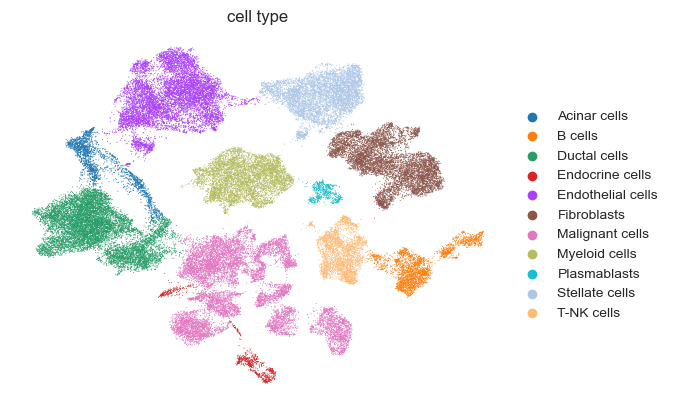

In [65]:
sc.pl.umap(adata, color = ['cell type'], frameon = False)

In [66]:
adata.obs.groupby(['Patient']).count()

Condition  n_genes_by_counts  total_counts  total_counts_mt  \
Patient                                                                
N1            2823               2823          2823             2823   
N2            1959               1959          1959             1959   
N3             455                455           455              455   
N4             974                974           974              974   
N5             887                887           887              887   
N6             718                718           718              718   
N7            1115               1115          1115             1115   
N8            1220               1220          1220             1220   
N9            2468               2468          2468             2468   
N10           1543               1543          1543             1543   
N11           1382               1382          1382             1382   
T1            1171               1171          1171             1171   
T2            3041               3041          3041             3041   
T3            1317               1317          1317             1317   
T4            1027               1027          1027             1027   
T5            1115               1115          1115             1115   
T6            1871               1871          1871             1871   
T7             747                747           747              747   
T8             697                697           697              697   
T9            2354               2354          2354             2354   
T10            828                828           828              828   
T11           3142               3142          3142             3142   
T12           2270               2270          2270             2270   
T13           2058               2058          2058             2058   
T14           1998               1998          1998             1998   
T15           1956               1956          1956             1956   
T16           1634               1634          1634             1634   
T17           2085               2085          2085             2085   
T18           1562               1562          1562             1562   
T19           2927               2927          2927             2927   
T20            482                482           482              482   
T21            807                807           807              807   
T22           2215               2215          2215             2215   
T23           2865               2865          2865             2865   
T24           1817               1817          1817             1817   

         pct_counts_mt  _scvi_batch  _scvi_labels  leiden  cell type  \
Patient                                                                
N1                2823         2823          2823    2823       2823   
N2                1959         1959          1959    1959       1959   
N3                 455          455           455     455        455   
N4                 974          974           974     974        974   
N5                 887          887           887     887        887   
N6                 718          718           718     718        718   
N7                1115         1115          1115    1115       1115   
N8                1220         1220          1220    1220       1220   
N9                2468         2468          2468    2468       2468   
N10               1543         1543          1543    1543       1543   
N11               1382         1382          1382    1382       1382   
T1                1171         1171          1171    1171       1171   
T2                3041         3041          3041    3041       3041   
T3                1317         1317          1317    1317       1317   
T4                1027         1027          1027    1027       1027   
T5                1115         1115          1115    1115       1115   
T6                1871         1871          187

In [67]:
num_tot_cells = adata.obs.groupby(['Patient']).count()
num_tot_cells = dict(zip(num_tot_cells.index, num_tot_cells.leiden))
num_tot_cells

{'N1': 2823,
 'N2': 1959,
 'N3': 455,
 'N4': 974,
 'N5': 887,
 'N6': 718,
 'N7': 1115,
 'N8': 1220,
 'N9': 2468,
 'N10': 1543,
 'N11': 1382,
 'T1': 1171,
 'T2': 3041,
 'T3': 1317,
 'T4': 1027,
 'T5': 1115,
 'T6': 1871,
 'T7': 747,
 'T8': 697,
 'T9': 2354,
 'T10': 828,
 'T11': 3142,
 'T12': 2270,
 'T13': 2058,
 'T14': 1998,
 'T15': 1956,
 'T16': 1634,
 'T17': 2085,
 'T18': 1562,
 'T19': 2927,
 'T20': 482,
 'T21': 807,
 'T22': 2215,
 'T23': 2865,
 'T24': 1817}

In [68]:
cell_type_counts = adata.obs.groupby(['Patient', 'Condition', 'cell type']).count()
cell_type_counts = cell_type_counts[cell_type_counts.sum(axis = 1) > 0].reset_index()
cell_type_counts = cell_type_counts[cell_type_counts.columns[0:4]]
cell_type_counts

Patient Condition          cell type  n_genes_by_counts
0        N1         N       Acinar cells                 44
1        N1         N       Ductal cells               1691
2        N1         N    Endocrine cells                 21
3        N1         N  Endothelial cells                527
4        N1         N        Fibroblasts                302
..      ...       ...                ...                ...
339     T24         T    Malignant cells                221
340     T24         T      Myeloid cells                 84
341     T24         T       Plasmablasts                 34
342     T24         T     Stellate cells                295
343     T24         T         T-NK cells                 76

[344 rows x 4 columns]

In [69]:
cell_type_counts['total_cells'] = cell_type_counts.Patient.map(num_tot_cells).astype(int)

cell_type_counts['frequency'] = cell_type_counts.n_genes_by_counts / cell_type_counts.total_cells

cell_type_counts

Patient Condition          cell type  n_genes_by_counts  total_cells  \
0        N1         N       Acinar cells                 44         2823   
1        N1         N       Ductal cells               1691         2823   
2        N1         N    Endocrine cells                 21         2823   
3        N1         N  Endothelial cells                527         2823   
4        N1         N        Fibroblasts                302         2823   
..      ...       ...                ...                ...          ...   
339     T24         T    Malignant cells                221         1817   
340     T24         T      Myeloid cells                 84         1817   
341     T24         T       Plasmablasts                 34         1817   
342     T24         T     Stellate cells                295         1817   
343     T24         T         T-NK cells                 76         1817   

     frequency  
0     0.015586  
1     0.599008  
2     0.007439  
3     0.186681  
4     0.106978  
..         ...  
339   0.121629  
340   0.046230  
341   0.018712  
342   0.162356  
343   0.041827  

[344 rows x 6 columns]

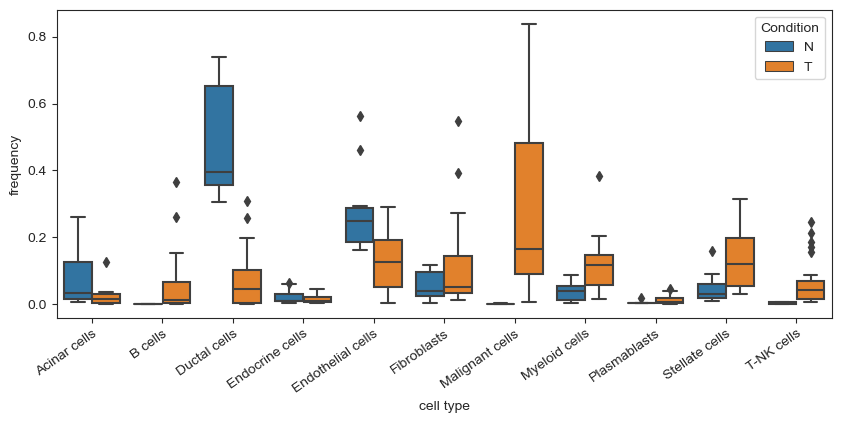

In [70]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10,4))

ax = sns.boxplot(data = cell_type_counts, x = 'cell type', y = 'frequency', hue = 'Condition')

plt.xticks(rotation = 35, rotation_mode = 'anchor', ha = 'right')

plt.show()

In [60]:
sc.tl.rank_genes_groups(adata, 'leiden', method='wilcoxon')

In [61]:
markers = sc.get.rank_genes_groups_df(adata, None)
markers = markers[(markers.pvals_adj < 0.05) & (markers.logfoldchanges > .5)]
markers

group    names      scores  logfoldchanges     pvals  pvals_adj
0          0    RAMP2  143.428986        6.230745  0.000000   0.000000
1          0    PLVAP  142.694839        5.874628  0.000000   0.000000
2          0    GNG11  139.405884        3.920182  0.000000   0.000000
3          0      A2M  133.423676        3.977238  0.000000   0.000000
4          0    EPAS1  133.209579        4.124618  0.000000   0.000000
...      ...      ...         ...             ...       ...        ...
307874    17    TLCD4    2.676268        1.140791  0.007445   0.047931
307878    17    SUZ12    2.668456        0.707255  0.007620   0.048921
307880    17  PROSER2    2.661863        1.608483  0.007771   0.049747
307881    17   CLASP1    2.661293        0.907166  0.007784   0.049797
307883    17     LIPE    2.661037        1.615002  0.007790   0.049816

[41644 rows x 6 columns]

In [62]:
markers_scvi = model.differential_expression(groupby = 'leiden')

DE...: 100%|███████████████████████████████████████████████████████████████████████████| 18/18 [01:30<00:00,  5.04s/it]


In [71]:
adata.uns['scvi_markers'] = markers_scvi
adata.uns['markers'] = markers

In [72]:
adata.write_h5ad('D:/Scanpy/scvipeng.h5ad')

In [73]:
model.save('D:/Scanpy/pengscvimodel.model')